<a href="https://colab.research.google.com/github/Void-Brain70/Machine_Learning/blob/main/Age_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense,BatchNormalization
import numpy as np
from tensorflow.keras.callbacks import TensorBoard
import time
import matplotlib.pyplot as plt
import datetime
import cv2
import os
import tensorflow as tf
import tensorflow.keras
import cv2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
print('tf version', tf.__version__)
print('keras version', tf.keras.__version__)
print('gpu is ','available' if tf.config.list_physical_devices('GPU') else 'not available')

tf version 2.5.0
keras version 2.5.0
gpu is  available


In [ ]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/Dataset/60-98/70_0_1_20170120225116936.jpg
/content/drive/MyDrive/Dataset/60-98/65_1_0_20170110150303627.jpg
/content/drive/MyDrive/Dataset/60-98/60_1_0_20170110154325940.jpg
/content/drive/MyDrive/Dataset/60-98/62_0_0_20170111205219231.jpg
/content/drive/MyDrive/Dataset/60-98/60_1_1_20170110122649846.jpg
/content/drive/MyDrive/Dataset/60-98/68_0_0_20170104184637742.jpg
/content/drive/MyDrive/Dataset/60-98/65_0_0_20170111210851993.jpg
/content/drive/MyDrive/Dataset/60-98/60_0_2_20170116192532074.jpg
/content/drive/MyDrive/Dataset/60-98/62_0_1_20170117183538747.jpg
/content/drive/MyDrive/Dataset/60-98/68_0_0_20170111205947306.jpg
/content/drive/MyDrive/Dataset/60-98/68_1_0_20170103184201412.jpg
/content/drive/MyDrive/Dataset/60-98/75_0_0_20170117174511134.jpg
/content/drive/MyDrive/Dataset/60-98/65_0_1_20170117191903245.jpg
/content/drive/MyDrive/Dataset/60-98/69_1_0_20170110140940217.jpg
/content/drive/MyDrive/Da

In [ ]:
subdir = ['25-30','42-48','60-98','6-20']
path = '/content/drive/MyDrive/Dataset/'

target_name = {'25-30': 0, '42-48': 1, '60-98': 2, '6-20': 3}
X, y = [], []
for age in subdir:
    for img_name in os.listdir(path+age):
        img = cv2.imread(path+age+'/'+img_name)
        scalled_raw_img = cv2.resize(img, (80, 80))/255.0
        X.append(scalled_raw_img)
        y.append(target_name[age])

In [ ]:
len(X), len(y)

(9097, 9097)

In [ ]:
X, y = np.array(X), np.array(y)
X.shape, y.shape

((9097, 80, 80, 3), (9097,))

In [ ]:
y = tf.keras.utils.to_categorical(y, num_classes=4)
y.shape

(9097, 4)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7277, 80, 80, 3), (1820, 80, 80, 3), (7277, 4), (1820, 4))

In [ ]:
base_model.summary()

In [ ]:
base_model

In [ ]:
base_model = tf.keras.applications.Xception(
    include_top=False,
    weights="imagenet",
    input_shape=(80, 80, 3),
    pooling='avg',
    classes=4,
    classifier_activation="softmax",
)

83689472/83683744 [==============================] - 1s 0us/step


In [ ]:
num_of_class = 4
epoch = 20

model = Sequential()
model.add(base_model)
model.add(Dropout(0.5))
model.add(Dense(num_of_class, activation='softmax'))


model.compile(loss ='categorical_crossentropy',
                     optimizer ='adam', 
                   metrics =['accuracy'])

In [ ]:
H = model.fit(
    x=X_train,
    y=y_train,
    batch_size=256,
    epochs=epoch,
    validation_data=(X_test, y_test)) #Model Training

Epoch 1/20
29/29 [==============================] - 58s 674ms/step - loss: 1.3859 - accuracy: 0.2872 - val_loss: 1.3618 - val_accuracy: 0.3659
Epoch 2/20
29/29 [==============================] - 16s 537ms/step - loss: 1.3804 - accuracy: 0.2898 - val_loss: 1.3771 - val_accuracy: 0.3088
Epoch 3/20
29/29 [==============================] - 16s 547ms/step - loss: 1.3771 - accuracy: 0.2898 - val_loss: 1.3740 - val_accuracy: 0.2967
Epoch 4/20
29/29 [==============================] - 16s 555ms/step - loss: 1.3744 - accuracy: 0.2898 - val_loss: 1.3713 - val_accuracy: 0.2967
Epoch 5/20
29/29 [==============================] - 16s 559ms/step - loss: 1.3722 - accuracy: 0.2898 - val_loss: 1.3688 - val_accuracy: 0.2967
Epoch 6/20
29/29 [==============================] - 17s 594ms/step - loss: 1.3090 - accuracy: 0.3849 - val_loss: 11.9235 - val_accuracy: 0.4500
Epoch 7/20
29/29 [==============================] - 17s 601ms/step - loss: 0.7997 - accuracy: 0.6577 - val_loss: 13.8929 - val_accuracy: 0.31

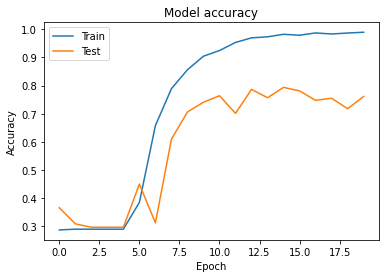

In [ ]:
# Plot training & validation accuracy values
fig, ax = plt.subplots(1,1)
plt.plot(H.history["accuracy"])
plt.plot(H.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

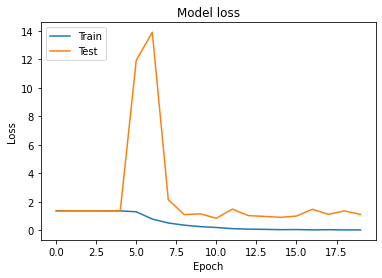

In [ ]:
# Plot training & validation loss values
fig, ax = plt.subplots(1,1)
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Classification Report
              precision    recall  f1-score   support

       25-30       0.77      0.57      0.65       505
       42-48       0.48      0.72      0.57       272
       60-98       0.89      0.90      0.89       540
        6-20       0.85      0.83      0.84       503

    accuracy                           0.76      1820
   macro avg       0.75      0.75      0.74      1820
weighted avg       0.78      0.76      0.76      1820



Text(69.0, 0.5, 'Predicted')

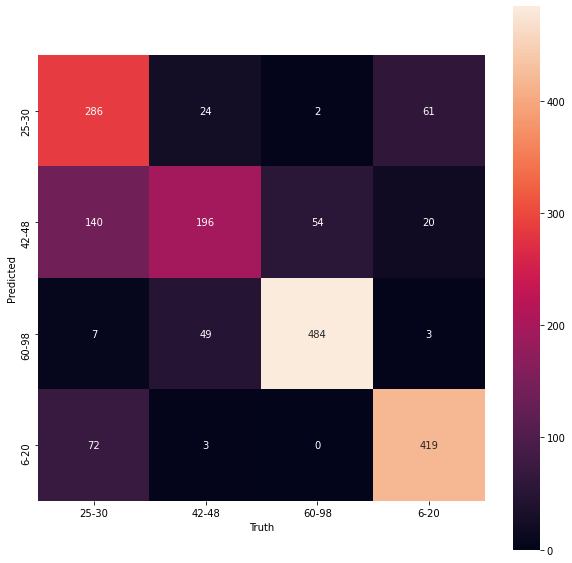

In [ ]:
y_pred = np.argmax(model.predict(X_test,batch_size=1), axis=1) 

print('Classification Report')
y_classes = [np.argmax(y, axis=None, out=None) for y in y_test]
report = classification_report(y_classes, y_pred, target_names=target_name.keys())
print(report)

plt.figure(figsize=(10,10))
cm = confusion_matrix(y_classes, y_pred)
_=sns.heatmap(cm.T, annot=True, fmt='d', cbar=True, square=True, xticklabels=target_name.keys(),
             yticklabels=target_name.keys())
plt.xlabel('Truth')
plt.ylabel('Predicted')